In [87]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  

from scipy import stats
from scipy.optimize import curve_fit
rng = np.random.default_rng()
import os
path='pic' #创建图片文件
os.makedirs(path,exist_ok=True) 

# 打印不确定度

In [228]:
from math import log,floor

def print_result(x,dx,latex=0):
    order_x=floor(log(abs(x))/log(10))
    order_dx=floor(log(abs(dx))/log(10))
    value_x=x/10**order_x
    value_dx=dx/10**order_dx
    delord=order_x-order_dx
    duobao=0
    if (value_dx<2):
        duobao=1
    else:
        value_dx=int(value_dx+0.5)
    
    value_dx=value_dx*10**(-delord)
    # order_x=log(x)/log(10)
    delord+=duobao
    value_x_show=f"{value_x:.{delord}f}"
    value_dx_show=f"{value_dx:.{delord}f}"

    if latex==1:
        return(f'$({value_x_show} \\pm {value_dx_show}) \\times 10^{{{order_x}}}$')
    else:
        return(f'({value_x_show} ± {value_dx_show} )×10^{order_x}')

# 线性拟合

In [89]:
def mylinearfit(x,y,figuresize=(8,4),title='Linear Fit',labeldot='测量数据',labeline='拟合直线',save=None,x_label='Time(s)', y_label='Voltage (V)'):
    res = stats.linregress(x, y)
    k=res.slope
    dk=res.stderr
    b=res.intercept
    db=res.intercept_stderr
    Rco=res.rvalue
    # print(f"斜率为:k={k} ± {dk}\n latex 代码为{print_result(k,dk,latex=1)}\n截距为:b={b} ± {db}\nlatex 代码为{print_result(b,db,latex=1)}\nThe Pearson correlation coefficient:{Rco}")
    print(f"斜率为:k={k} ± {dk}\n{print_result(k,dk,latex=1)}\n截距为:b={b} ± {db}\n{print_result(b,db,latex=1)} \n皮尔逊相关系数{Rco}\n决定系数/拟合优度{Rco**2}")
    # print(f"{print_result(k,dk,latex=1)}")
    
    plt.figure(figsize=figuresize)
    plt.plot(x, y, 'o', label=labeldot)
    plt.plot(x, res.intercept + res.slope*x,'r', label=labeline)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    if save!=None:
        plt.savefig(save)
    plt.show()

    return (k,dk), (b,db)

## 示例

斜率为:k=1.6119203906081434 ± 0.01956107410271248
$1.612 \pm 0.020 \times 10^0$
截距为:b=-0.007390711464579924 ± 0.011343743541412245
$-7 \pm 11 \times 10^-3$ 
皮尔逊相关系数0.9787543505798411
决定系数/拟合优度0.9579600787789664


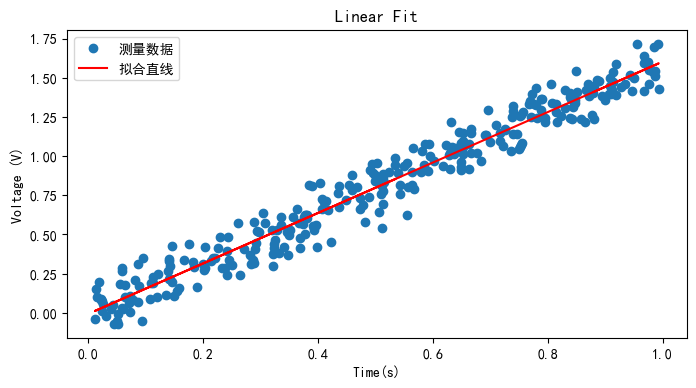

(1.6119203906081434, 0.01956107410271248)
(-0.007390711464579924, 0.011343743541412245)


In [90]:
save='linearfit.pdf'
x = rng.random(300)
y = 1.6*x +rng.normal(0, 0.1, 300)
k,d=mylinearfit(x,y,save=path+'/'+save)
print(k)
print(d)

# 一般曲线拟合

[2.55423706 1.35190947 0.47450618]
[2.43708906 1.         0.35015434]
[[ 0.01521864  0.00291009 -0.00223465]
 [ 0.00291009  0.01677755  0.00839441]
 [-0.00223465  0.00839441  0.00615306]]


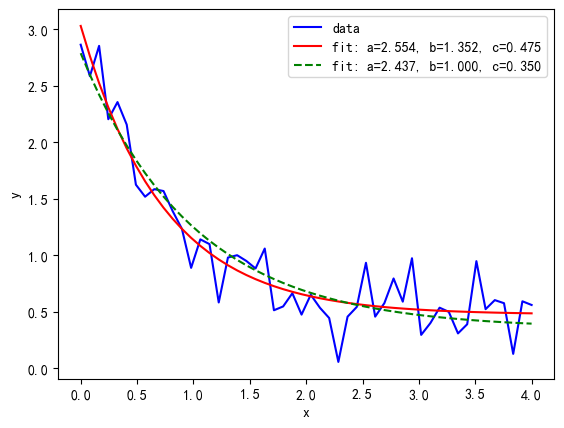

In [92]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np


# 定义需要拟合的函数
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


# Define the data to be fit with some noise:
# 用numpy的random库生成干扰
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
# Fit for the parameters a, b, c of the function func:

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:
# 限定范围进行拟合
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt)

print(pcov)

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
#结果
#[2.55423706 1.35190947 0.47450618]
#[2.43708905 1.         0.35015434]

In [118]:
def mycurve_fit(func,xdata,ydata,figuresize=(8,4),datalabel='测量数据',curvelabel='拟合曲线',title='曲线拟合',x_label='时间(s)',y_label='电压值',save=None):
    popt, pcov= curve_fit(func, xdata, ydata)
    # print(dic1)
    # fvec=dic[fvec]
    for i,value in enumerate(popt):
        sig=np.sqrt(pcov[i][i])
        print(f"第{i+1}个参数的值为{value}，其不确定度为{sig}，结果报道为{print_result(value,sig,latex=1)}")
    
    #此后都是作图
    plt.figure(figsize=figuresize)
    plt.plot(xdata, ydata, 'o', label=datalabel)
    # Fit for the parameters a, b, c of the function func:
    max_value = np.max(xdata)
    min_value = np.min(xdata)
    linspace_xdata = np.linspace(min_value, max_value, 100)

    plt.plot(linspace_xdata, func(linspace_xdata, *popt), 'r-',label=curvelabel)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    if save!=None:
        plt.savefig(save)
    plt.legend()
    plt.show()
    return popt,pcov

# 实际使用

第1个参数的值为1.9927829560585886，其不确定度为0.011486954400817203，结果报道为$1.993 \pm 0.011 \times 10^0$


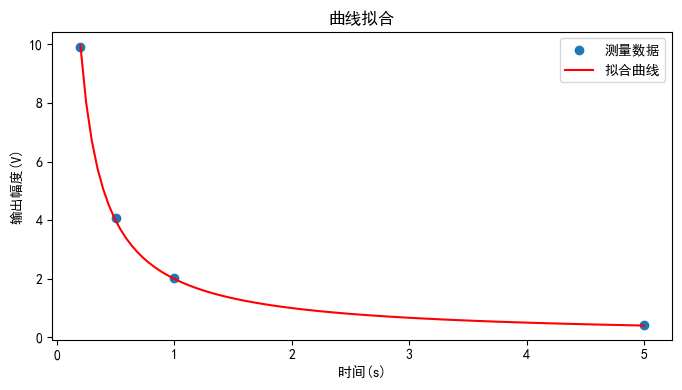

(array([1.99278296]), array([[0.00013195]]))

In [222]:
def func(x, a):
    return a/x

xdata=[0.2,0.5,1.0,5.0]
ydata=[9.920,4.080,2.020,0.4160]
mycurve_fit(func,xdata,ydata,save=path+'/'+'curvefit.pdf',y_label='输出幅度(V)')

In [111]:
xdata=np.array([0.2,0.5,1.0,5.0])*1000
ydata=np.array([9.920,4.080,2.020,0.4160])
xydata=xdata*ydata
# xydata
print(np.mean(xydata),np.std(xydata,ddof=1),np.std(xydata,ddof=1)/np.mean(xydata))

2031.0 40.049968789001575 0.019719334706549272


斜率为:k=0.9717105899809684 ± 0.02627155885386028
$(9.7 \pm 0.3) \times 10^{-1}$
截距为:b=3.954345988839069 ± 0.03217617147539246
$(3.95 \pm 0.03) \times 10^{0}$ 
皮尔逊相关系数0.9989053494074461
决定系数/拟合优度0.997811897074812


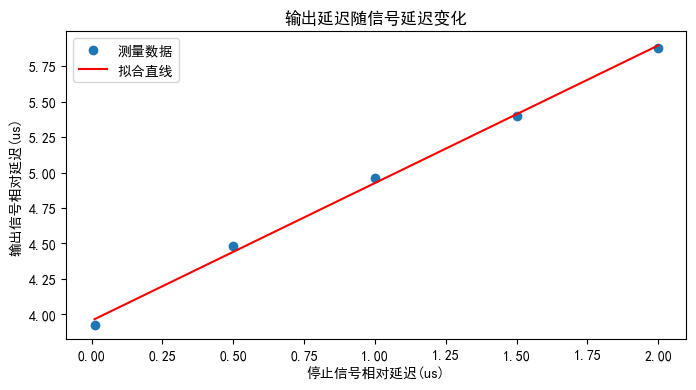

((0.9717105899809684, 0.02627155885386028),
 (3.954345988839069, 0.03217617147539246))

In [234]:
Delta_t=np.array([10,500,1000,1500,2000])
Delta_t=Delta_t/1000
Voltage=np.array([0.03400,2.520,5.080,7.680,10.200])
Delay=np.array([3.920,4.480,4.960,5.400,5.880])

# mylinearfit(Delta_t,Voltage,save=path+'/'+'t-V')
mylinearfit(Delta_t,Delay,save=path+'/'+'tdt.pdf',title="输出延迟随信号延迟变化",x_label="停止信号相对延迟(us)",y_label='输出信号相对延迟(us)')

,延迟,幅度
0,10,34.2
1,20,86.4
2,30,135.0
3,40,191.0
4,50,240.0


斜率为:k=5.162000000000001 ± 0.059002824791115537
$(5.16 \pm 0.06) \times 10^{0}$
截距为:b=-17.54000000000002 ± 1.9569023140320998
$(-1.75 \pm 0.20) \times 10^{1}$ 
皮尔逊相关系数0.9998040825030216
决定系数/拟合优度0.9996082033897087


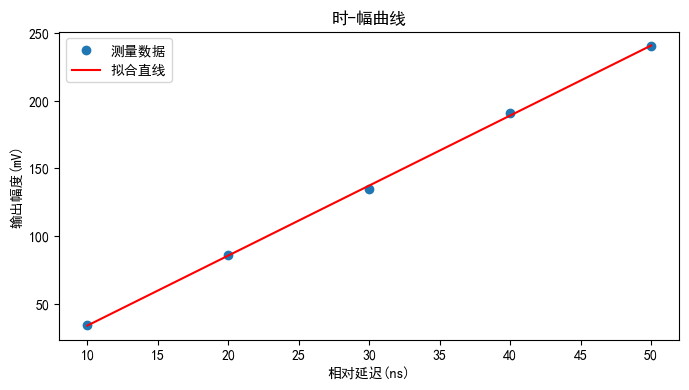

((5.162000000000001, 0.059002824791115537),
 (-17.54000000000002, 1.9569023140320998))

In [235]:
import pandas as pd

df = pd.read_excel('bianhuanxishu.xlsx',sheet_name="Sheet2")
display(df)
xdata0 = df['延迟'].values
ydata0 =df['幅度'].values
mylinearfit(xdata0,ydata0,save=path+'/'+'sfbhxs_near0.pdf',title="时-幅曲线",x_label="相对延迟(ns)",y_label='输出幅度(mV)')

In [213]:

df = pd.read_excel('bianhuanxishu.xlsx')
display(df)
xdata = np.concatenate((xdata0,df['相位'].values*50))
# xdata*=50
ydata=np.concatenate((ydata0/1000,(df['幅度1'].values+df['幅度2'].values)/2))

display(xdata)
display(ydata)


,相位,幅度1,幅度2
0,2,0.500,0.50
1,4,1.024,1.03
2,6,1.046,1.48
3,8,1.980,2.00
4,10,2.500,2.56
5,12,3.000,3.08
6,14,3.520,3.60
7,16,4.040,4.08
8,18,4.540,4.64
9,20,5.060,5.12


array([  10,   20,   30,   40,   50,  100,  200,  300,  400,  500,  600,
        700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
       1800, 1900, 2000], dtype=int64)

array([ 0.0342,  0.0864,  0.135 ,  0.191 ,  0.24  ,  0.5   ,  1.027 ,
        1.263 ,  1.99  ,  2.53  ,  3.04  ,  3.56  ,  4.06  ,  4.59  ,
        5.09  ,  5.62  ,  6.12  ,  6.64  ,  7.12  ,  7.68  ,  8.16  ,
        8.72  ,  9.2   ,  9.68  , 10.24  ])

In [230]:
def mylinearfit_here(x,y,figuresize=(8,4),title='Linear Fit',labeldot='测量数据',labeline='拟合直线',save1=None,save2=None,x_label='Time(s)', y_label='Voltage (V)'):
    res = stats.linregress(x, y)
    k=res.slope
    dk=res.stderr
    b=res.intercept
    db=res.intercept_stderr
    Rco=res.rvalue
    # print(f"斜率为:k={k} ± {dk}\n latex 代码为{print_result(k,dk,latex=1)}\n截距为:b={b} ± {db}\nlatex 代码为{print_result(b,db,latex=1)}\nThe Pearson correlation coefficient:{Rco}")
    print(f"斜率为:k={k} ± {dk}\n{print_result(k,dk,latex=1)}\n截距为:b={b} ± {db}\n{print_result(b,db,latex=1)} \n皮尔逊相关系数{Rco}\n决定系数/拟合优度{Rco**2}")
    # print(f"{print_result(k,dk,latex=1)}")
    
    plt.figure(figsize=figuresize)
    plt.plot(x, y, 'o', label=labeldot)
    y_pre=res.intercept + res.slope*x
    plt.plot(x, y_pre ,'r', label=labeline)
    dy=np.abs(y-y_pre)
    i_max=np.argmax(dy)
    print(f'当延迟时间为{x[i_max]}时，偏差最大为{dy[i_max]}，积分非线性性为除以{y[-1]}得到{dy[i_max]/y[-1]}')
    plt.scatter(x[i_max], y[i_max], s=160, marker='+',color='r', label='最大偏离点')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    if save1!=None:
        plt.savefig(save1)
    plt.show()

    x=np.delete(x,i_max)
    y=np.delete(y,i_max)
    print('删掉偏离最大的元素后')
    res = stats.linregress(x, y)
    k=res.slope
    dk=res.stderr
    b=res.intercept
    db=res.intercept_stderr
    Rco=res.rvalue
    # print(f"斜率为:k={k} ± {dk}\n latex 代码为{print_result(k,dk,latex=1)}\n截距为:b={b} ± {db}\nlatex 代码为{print_result(b,db,latex=1)}\nThe Pearson correlation coefficient:{Rco}")
    print(f"斜率为:k={k} ± {dk}\n{print_result(k,dk,latex=1)}\n截距为:b={b} ± {db}\n{print_result(b,db,latex=1)} \n皮尔逊相关系数{Rco}\n决定系数/拟合优度{Rco**2}")
    # print(f"{print_result(k,dk,latex=1)}")
    
    plt.figure(figsize=figuresize)
    plt.plot(x, y, 'o', label=labeldot)
    y_pre=res.intercept + res.slope*x
    plt.plot(x, y_pre ,'r', label=labeline)
    dy=np.abs(y-y_pre)
    i_max=np.argmax(dy)
    print(f'当延迟时间为{x[i_max]}时，偏差最大为{dy[i_max]}，积分非线性性为除以{y[-1]}得到{dy[i_max]/y[-1]}')
    plt.scatter(x[i_max], y[i_max], s=160, marker='+',color='r', label='最大偏离点')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    if save2!=None:
        plt.savefig(save2)
    plt.show()

    return (k,dk), (b,db)

斜率为:k=0.005133364445184323 ± 1.6264866242451368e-05
$5.133 \pm 0.016 \times 10^-3$
截距为:b=-0.04216232062593672 ± 0.017428621956771116
$-4.2 \pm 1.7 \times 10^-2$ 
皮尔逊相关系数0.9998845698035012
决定系数/拟合优度0.9997691529311326
当延迟时间为300时，偏差最大为0.23484701292936028


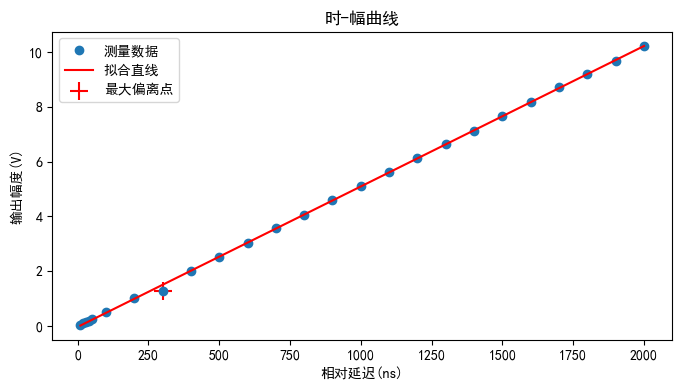

删掉偏离最大的元素后
斜率为:k=0.005120646063570845 ± 5.360835117927778e-06
$5.121 \pm 0.005 \times 10^-3$
截距为:b=-0.021327934393838177 ± 0.005853660065847642
$-2.1 \pm 0.6 \times 10^-2$ 
皮尔逊相关系数0.9999879440839846
决定系数/拟合优度0.9999758883133143
当延迟时间为400时，偏差最大为0.03693049103449986，积分非线性性为除以10.24得到0.0036064932650878767


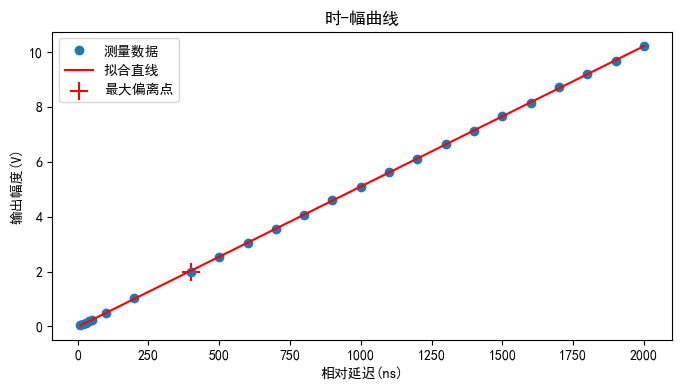

((0.005120646063570845, 5.360835117927778e-06),
 (-0.021327934393838177, 0.005853660065847642))

In [219]:
mylinearfit_here(xdata,ydata,save1=path+'/'+'sfbhxs.pdf',save2=path+'/'+'sfbhxs_sdj.pdf',title="时-幅曲线",x_label="相对延迟(ns)",y_label='输出幅度(V)')

In [231]:
df = pd.read_excel('bianhuanxishu.xlsx')
display(df)
xdata = df['相位'].values*50
# xdata*=50
ydata=(df['幅度1'].values+df['幅度2'].values)/2

display(xdata)
display(ydata)

,相位,幅度1,幅度2
0,2,0.500,0.50
1,4,1.024,1.03
2,6,1.046,1.48
3,8,1.980,2.00
4,10,2.500,2.56
5,12,3.000,3.08
6,14,3.520,3.60
7,16,4.040,4.08
8,18,4.540,4.64
9,20,5.060,5.12


array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], dtype=int64)

array([ 0.5  ,  1.027,  1.263,  1.99 ,  2.53 ,  3.04 ,  3.56 ,  4.06 ,
        4.59 ,  5.09 ,  5.62 ,  6.12 ,  6.64 ,  7.12 ,  7.68 ,  8.16 ,
        8.72 ,  9.2  ,  9.68 , 10.24 ])

斜率为:k=0.005152902255639098 ± 2.223554066632338e-05
$(5.15 \pm 0.02) \times 10^{-3}$
截距为:b=-0.06904736842105219 ± 0.026636284474726192
$(-7 \pm 3) \times 10^{-2}$ 
皮尔逊相关系数0.9998324575223645
决定系数/拟合优度0.9996649431152108
当延迟时间为300时，偏差最大为0.21382330827067708，积分非线性性为除以10.24得到0.02088118244830831


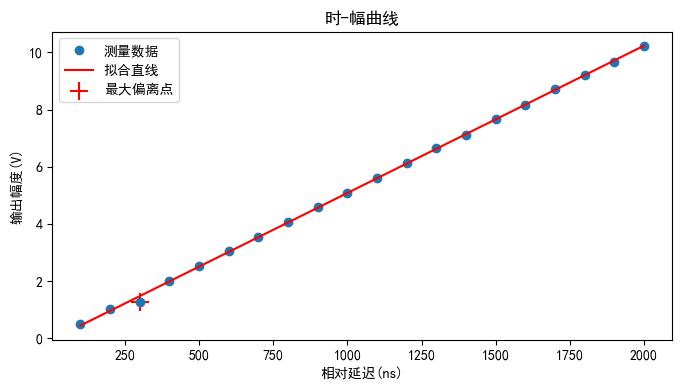

删掉偏离最大的元素后
斜率为:k=0.0051250364900086885 ± 7.853176453302962e-06
$(5.125 \pm 0.008) \times 10^{-3}$
截距为:b=-0.027434491746308076 ± 0.009636681027899356
$(-2.7 \pm 1.0) \times 10^{-2}$ 
皮尔逊相关系数0.999980042657425
决定系数/拟合优度0.9999600857131455
当延迟时间为1700时，偏差最大为0.03487245873153988，积分非线性性为除以10.24得到0.0034055135480019413


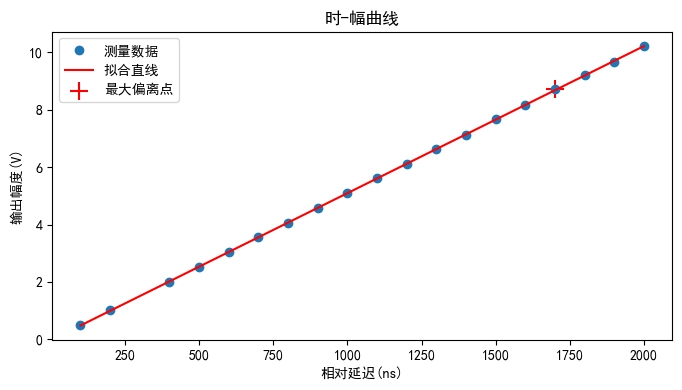

((0.0051250364900086885, 7.853176453302962e-06),
 (-0.027434491746308076, 0.009636681027899356))

In [232]:
mylinearfit_here(xdata,ydata,save1=path+'/'+'sfbhxs.pdf',save2=path+'/'+'sfbhxs_sdj.pdf',title="时-幅曲线",x_label="相对延迟(ns)",y_label='输出幅度(V)')

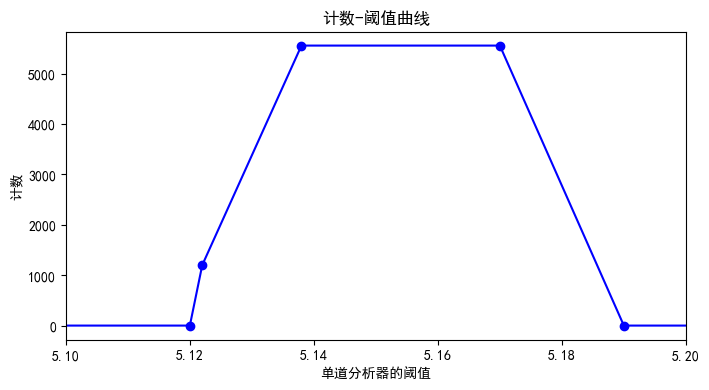

In [233]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  
import numpy as np

plt.figure(figsize=(8,4))
xdata=[5.138,5.170,5.190,5.122,5.120,0,10]
ydata=[5555,5555,0,1200,0,0,0]

# 使用zip函数将xdata和ydata同时按xdata的值排序
sorted_data = sorted(zip(xdata, ydata))

# 从排序后的数据中提取排序后的xdata和ydata
sorted_xdata, sorted_ydata = zip(*sorted_data)
plt.plot(sorted_xdata, sorted_ydata,'-ob')
plt.xlabel('单道分析器的阈值')
plt.ylabel('计数')
plt.xlim(5.10,5.20)
plt.title('计数-阈值曲线')
# plt.legend()
plt.savefig('pic/jishu_yuzhi.pdf')
plt.show()